# My 2500+ Linkedin Connections Analysis

**Important:**

Interactive plots are not supported in GitHub. Please click on the below link to view the all plots.


👉 [Jupyter Viewer](https://github.com/Hamza-Zaman/Hamza--Linkedin-Analysis/blob/main/my_linkedin_connections_analysis.ipynb)

```
The data contains the following fields:

```
1. First Name: First name of a person
2. Last Name: Last name of a person
3. Email Address: Email Address of a person
4. Company: Current company of connections
5. Position: Current position of connections in a company
6. Connected On: Date of connection made


**TechStack:** 
* Pandas
* Numpy
* Matplotlib
* Plotly
* WordCloud

#### 👉 Importing the libraries

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### 👉 My Connections Data Overview


In [243]:
network = pd.read_csv('connections.csv')

In [244]:
network.head(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Kristy,Bortle,NaN,The Hartford,"Senior Recruiter, Tech, Data & Analytics",21-Jul-22
1,Charlotte,Johnson,NaN,Salesloft,Account Executive,21-Jul-22
2,Salman,Ahmed,NaN,HamzaAi,Senior Data Scientist (Remote),21-Jul-22
3,Kevin,Sheppard,NaN,Office of Financial Research,Senior Researcher - Economist,21-Jul-22
4,Kurtis,Pykes,NaN,Self Employed,AI Technical Writer,21-Jul-22
5,Arpit,Bhayani,NaN,Unacademy,Director Of Engineering,21-Jul-22
6,Chandra,Kant,NaN,Cognizant,Programmer Analyst,21-Jul-22
7,Holger,Teichgraeber,NaN,Archer,Senior Data Scientist,21-Jul-22
8,Christian,Lane,NaN,Broadbean Technology,Business Development Manager,21-Jul-22
9,Quazi Omar,Ferdous,NaN,"MGH Logistics Asia Pte Ltd, Singapore",Technology Consultant,20-Jul-22


In [245]:
network.tail(10)

,First Name,Last Name,Email Address,Company,Position,Connected On
2570,Eric,Yager MS/MBA,NaN,Amazon,Software Development Manager - Amazon People E...,27-Mar-20
2571,Suman,Bhadra,NaN,FloatingChip Internet Technologies,Digital Marketing Consultant,23-Mar-20
2572,Chaudhry Souban,Afzal,NaN,researchteck(PVT)LTD.,sales &surveys,15-Mar-20
2573,Muhammad,Mahboob Ur Rehman,NaN,DreamBig Semiconductor Inc.,Sr. Hardware Engineer,15-Mar-20
2574,Ruhma,Tariq,NaN,DiveDeepAI,UI/UX Designer,15-Mar-20
2575,NaN,NaN,NaN,NaN,NaN,29-Jan-20
2576,Muhammad,Bilal,NaN,NAXXA Consulting,Junior Business Analyst,22-Sep-19
2577,Ali,Mirza,NaN,WhatSales,Senior Graphic Designer,22-Sep-19
2578,Salman,Mondal,NaN,Technical plce,Search Engine Optimization Specialist,22-Sep-19
2579,Muhammad,Hassan,NaN,Skyscrapers,International Support Executive,22-Sep-19


In [246]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   First Name     2571 non-null   object
 1   Last Name      2571 non-null   object
 2   Email Address  79 non-null     object
 3   Company        2540 non-null   object
 4   Position       2541 non-null   object
 5   Connected On   2580 non-null   object
dtypes: object(6)
memory usage: 121.1+ KB


In [247]:
network.shape

(2580, 6)

In [248]:
network.describe()

,First Name,Last Name,Email Address,Company,Position,Connected On
count,2571,2571,79,2540,2541,2580
unique,1735,2260,79,1872,1653,193
top,David,Gupta,mark.shpuntov@gmail.com,Amazon,Data Scientist,16-May-22
freq,22,12,1,57,130,85


In [249]:
network.count()

First Name       2571
Last Name        2571
Email Address      79
Company          2540
Position         2541
Connected On     2580
dtype: int64

In [250]:
network.nunique()

First Name       1735
Last Name        2260
Email Address      79
Company          1872
Position         1653
Connected On      193
dtype: int64

#### 👉 Converting Connected On Column To Date Format

In [251]:
dates = pd.to_datetime(network['Connected On'])
dates

0      2022-07-21
1      2022-07-21
2      2022-07-21
3      2022-07-21
4      2022-07-21
          ...    
2575   2020-01-29
2576   2019-09-22
2577   2019-09-22
2578   2019-09-22
2579   2019-09-22
Name: Connected On, Length: 2580, dtype: datetime64[ns]

In [252]:
network['Connected On'] = dates.dt.strftime('%B %d, %Y')
network

,First Name,Last Name,Email Address,Company,Position,Connected On
0,Kristy,Bortle,NaN,The Hartford,"Senior Recruiter, Tech, Data & Analytics","July 21, 2022"
1,Charlotte,Johnson,NaN,Salesloft,Account Executive,"July 21, 2022"
2,Salman,Ahmed,NaN,HamzaAi,Senior Data Scientist (Remote),"July 21, 2022"
3,Kevin,Sheppard,NaN,Office of Financial Research,Senior Researcher - Economist,"July 21, 2022"
4,Kurtis,Pykes,NaN,Self Employed,AI Technical Writer,"July 21, 2022"
...,...,...,...,...,...,...
2575,NaN,NaN,NaN,NaN,NaN,"January 29, 2020"
2576,Muhammad,Bilal,NaN,NAXXA Consulting,Junior Business Analyst,"September 22, 2019"
2577,Ali,Mirza,NaN,WhatSales,Senior Graphic Designer,"September 22, 2019"
2578,Salman,Mondal,NaN,Technical plce,Search Engine Optimization Specialist,"September 22, 2019"


In [277]:
network = network.sort_values(by='Connected On')
network

,First Name,Last Name,Email Address,Company,Position,Connected On
2222,Mostafa,Ghaderian,NaN,TriHealth,Research Statistician,"April 01, 2022"
2223,Jiayao,"Yuan, PhD",NaN,Masimo,Senior Algorithm Engineer,"April 01, 2022"
2224,Talha,Yerebakan,NaN,"University of California, Los Angeles",Doctoral Researcher,"April 01, 2022"
2225,Kennedy,Bagnol,NaN,General Assembly,Data Science Student,"April 01, 2022"
2219,NaN,NaN,NaN,NaN,NaN,"April 01, 2022"
...,...,...,...,...,...,...
2578,Salman,Mondal,NaN,Technical plce,Search Engine Optimization Specialist,"September 22, 2019"
2579,Muhammad,Hassan,NaN,Skyscrapers,International Support Executive,"September 22, 2019"
2505,Shannon,Roddy,NaN,Avenue7Media,Business Development,"September 23, 2021"
2504,Tim,Jordan,NaN,Private Label Legion & Centurion League,CEO & Founder,"September 23, 2021"


#### 👉 My Network Data Overview


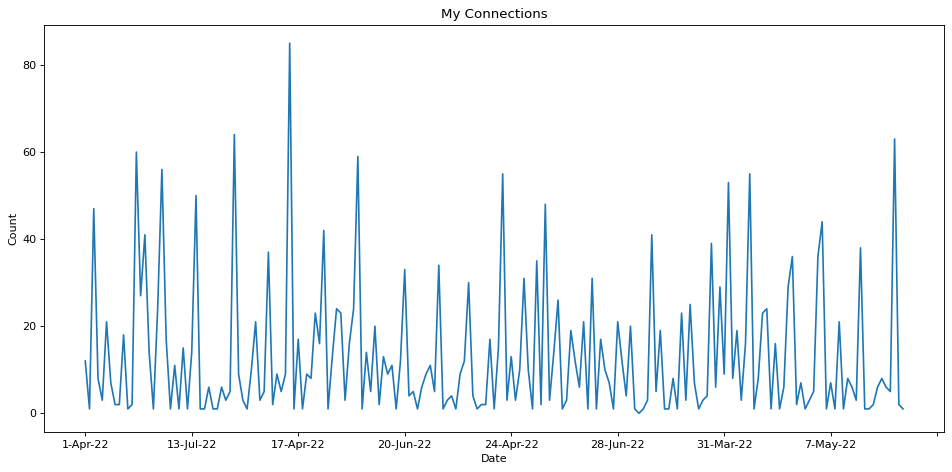

In [287]:
from matplotlib.pyplot import figure, xlabel, ylabel


figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
network.groupby(['Connected On'])['First Name'].count().plot(title = 'My Connections', xlabel= 'Date', ylabel = 'Count')
plt.tight_layout()
plt.show()

#### 👉 Companies Of My Connections


In [255]:
company_groupby = network.groupby(by='Company').count().reset_index().sort_values(by='First Name', ascending=False).reset_index(drop=True)
company_groupby

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Amazon,57,57,1,57,57
1,Amazon Web Services (AWS),40,40,1,40,40
2,H2O.ai,26,26,0,26,26
3,Accenture,24,24,0,24,24
4,Google,23,23,2,23,23
...,...,...,...,...,...,...
1867,Full Sail University,1,1,0,1,1
1868,Full Cycle,1,1,0,1,1
1869,"FulPhillment™ Solutions, LLC",1,1,1,1,1
1870,Frost Buddy,1,1,0,1,1


#### 👉 Interactive Plot Of Companies


In [256]:
fig = px.bar(company_groupby[:200],
      x='Company',
      y='First Name',
      labels={'First Name': 'Number'})
fig

#### 👉 Treemap Of Connections By Company

In [257]:
fig = px.treemap(company_groupby[:100], path=['Company', 'Position'],
          values='First Name',
          labels={'First Name': 'Number'})
fig

#### 👉 Common Last Names Of My Connections

In [258]:
fig = px.bar(network.groupby(by='Last Name').count().sort_values(by='First Name', ascending=False).reset_index()[:100],
      x='Last Name',
      y='First Name')
fig 

#### 👉 Position Count Of My Connections

In [259]:
network['Position'].value_counts()[network['Position'].value_counts()/len(network) * 100 > 0.5]

Data Scientist               130
Founder                       76
Senior Data Scientist         50
Co-Founder                    32
Technical Recruiter           26
Chief Executive Officer       25
CEO                           23
Recruiter                     23
Data Analyst                  21
Founder & CEO                 20
Recruitment Consultant        20
Software Engineer             17
Machine Learning Engineer     17
Associate                     16
Senior Recruiter              15
Director                      13
Name: Position, dtype: int64

In [260]:
fig = px.bar(network.groupby(by='Position').count().sort_values(by='First Name', ascending=False)[:10].reset_index(),
       x='Position',
       y='First Name',
       labels={'First Name': 'Count'},
        title= 'Positions In My Linkedin Network'
      )

fig.show()

In [261]:
network.Position.str.startswith('Data Scientist').sum()

168

In [262]:
positions = ' '.join(network[~network.Position.isnull()].Position.unique())

In [263]:
def make_wordcloud(new_text):
    ''''function to make wordcloud'''
    
    wordcloud = WordCloud(width = 800, height = 800, 
                min_font_size = 10,
                background_color='black', 
                colormap='Set2', 
                collocations=False).generate(new_text) 

    
    fig = plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 
    
    return fig

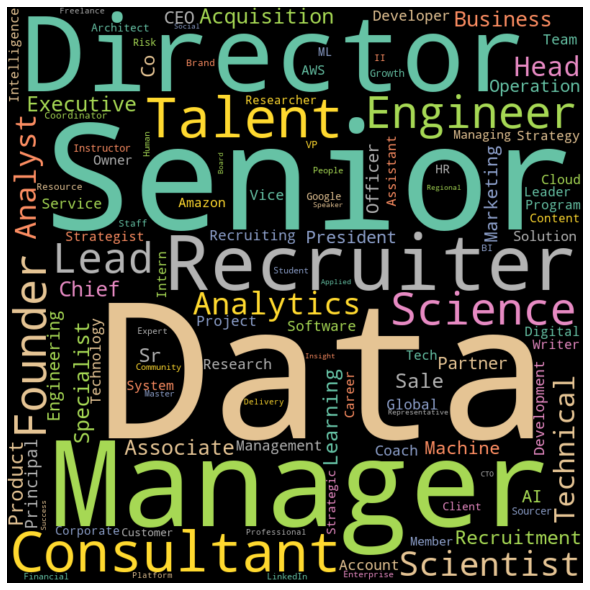

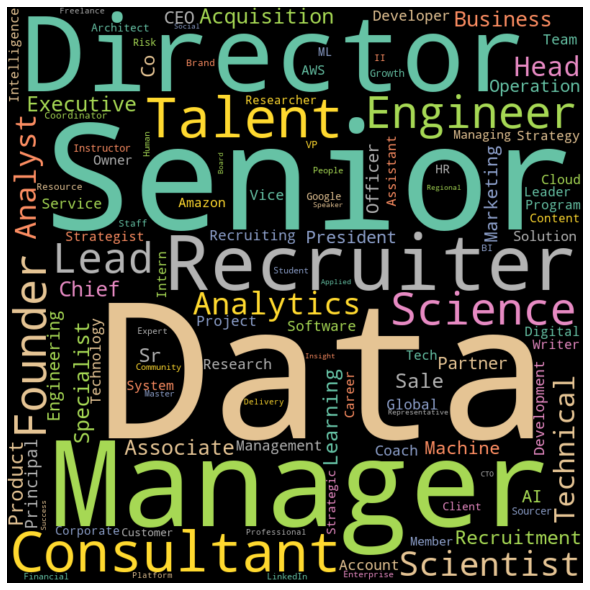

In [264]:
wordcloud = make_wordcloud(positions)
wordcloud